Bubble diagram / dynamic relaxation



In [2]:
# import needed library's
import pandas as pd
import numpy as np
import networkx as nx
import pyvista as pv
from compas.datastructures import Mesh as CompasMesh
import compas
import matplotlib.pyplot as plt

In [81]:
#inputs

#number of specific function
num_shop = 30
num_square = 2
num_workshop = num_shop // 2
num_storage = num_shop
num_anchors = 4

#create a list with all of the names of all the functions
functions = ["anchor"] * num_anchors + ["square"] * num_square + ["shop"] * num_shop + ["storage"] * num_storage + ["workshop"] * num_workshop
#calculate the total number of functions
num_functions = len(functions)
print("Total number of functions:",num_functions)

#m2
area = {
"shop" : 30,
"square" : 900,
"workshop" : 60,
"storage" : 10,
"anchor" : 1
}

Total number of functions: 81


In [82]:
#make a table with all the data regarding the functions

last_function = ""
i = 0
function_data = []
for func in functions:
    if last_function != func:
        i = 0
    space_i = func + str(i)
    function_data.append([func, space_i, area[func]])
    last_function = func
    i += 1

#pd.DataFrame(function_data, columns=["function_name", "space_index", "area"])

In [83]:
#create a list to store all of the connections
con = []
point = []

#make the node list without other information
for m in range(num_functions):
    point.append(m)

#create some empty lists to keep track of items that are already used
used_shops = []
used_storage = []
used_workshop = []
square_index = []
used_anchor = []
ansq_index = []


#find all of the connections
for b in range(num_functions):
    if function_data[b][0] == 'anchor':       
        for l in range(num_functions):
            if function_data[l][0] == 'square':
                if b not in used_anchor:                      
                    if len(ansq_index) == num_square:
                        ansq_index.clear()
                    if l not in ansq_index:
                        con.append((b,l))
                        ansq_index.append(l)
                        used_anchor.append(b)
    if function_data[b][0] == 'square':
        for l in range(num_functions):
            if function_data[l][0] == 'square':
                if (b,l) not in con and (l,b) not in con and b != l:
                    con.append((b,l))
    st_sh = 0
    sh_ws = 0
    if function_data[b][0] == 'shop':
        for i in range(num_functions):
            if function_data[i][0] == 'storage':
                if st_sh < 1:
                    if i not in used_storage and b != i:
                        con.append((b,i))
                        used_storage.append(i)
                        st_sh = 1
            if function_data[i][0] == 'workshop':
                if sh_ws < 1:
                    if i not in used_workshop and b != i:
                        con.append((b,i))
                        used_workshop.append(i)
                        sh_ws = 1
            if function_data[i][0] == 'square':
                if b not in used_shops:
                    if len(square_index) == num_square:
                        square_index.clear()
                    if i not in square_index:
                        con.append((b,i))
                        square_index.append(i)
                        used_shops.append(b)


#assign some shops to a second square
dbl_shop = []
for b in range(num_functions):
    dbl = 0
    d = 0
    if function_data[b][0] == 'square':
        for l in range(num_functions):
            if function_data[l][0] == 'shop':
                if (b,l) in con or (l,b) in con:
                    if l not in dbl_shop:
                        for i in range(num_functions):
                            if function_data[i][0] == 'square':
                                if b != i:
                                    if dbl == 0:
                                        if i > b:
                                            con.append((l,i))
                                            dbl_shop.append(l)
                                            print('check')
                                            dbl += 1
                                        else: d +=1
                                        if d == num_square-1:
                                            print("check 2")
                                            o = 0
                                            for k in range(num_functions):
                                                if function_data[k][0] == 'square':
                                                    if o == 0:
                                                        con.append((k,l))
                                                        print("check 3")
                                                        o += 1

#check the connections visualy
print(con)

check
check 2
check 3
[(0, 4), (1, 5), (2, 4), (3, 5), (4, 5), (6, 4), (6, 36), (6, 66), (7, 5), (7, 37), (7, 67), (8, 4), (8, 38), (8, 68), (9, 5), (9, 39), (9, 69), (10, 4), (10, 40), (10, 70), (11, 5), (11, 41), (11, 71), (12, 4), (12, 42), (12, 72), (13, 5), (13, 43), (13, 73), (14, 4), (14, 44), (14, 74), (15, 5), (15, 45), (15, 75), (16, 4), (16, 46), (16, 76), (17, 5), (17, 47), (17, 77), (18, 4), (18, 48), (18, 78), (19, 5), (19, 49), (19, 79), (20, 4), (20, 50), (20, 80), (21, 5), (21, 51), (22, 4), (22, 52), (23, 5), (23, 53), (24, 4), (24, 54), (25, 5), (25, 55), (26, 4), (26, 56), (27, 5), (27, 57), (28, 4), (28, 58), (29, 5), (29, 59), (30, 4), (30, 60), (31, 5), (31, 61), (32, 4), (32, 62), (33, 5), (33, 63), (34, 4), (34, 64), (35, 5), (35, 65), (6, 5), (4, 7)]


In [84]:
#shervins piece of code from the workshop

G = nx.Graph()
G.add_nodes_from(point)
G.add_edges_from(con)

#find the size of the connection matrix
Matrix_size = (num_functions, num_functions)
# Make the empty connection matrix
Con_matrix = np.zeros(Matrix_size, dtype=int)
# iterate over the egdes
for n1, n2 in con:
    Con_matrix[n1, n2] = 1 
    Con_matrix[n2, n1] = 1

#display as pandas dataframe
#display(pd.DataFrame(Con_matrix))

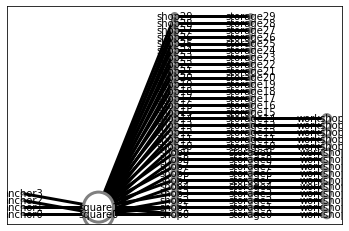

In [85]:
#give all of the nodes a position
positions = {}

last_function = ""

x_pos = 0
y_pos = 0

r = 0
for func in functions:
    if last_function != func:
        x_pos = x_pos+500
        y_pos = 0
    positions[r] = (x_pos,y_pos)
    last_function = func
    r += 1
    y_pos = y_pos+500

#make a dictonary with labels for all of the functions
labels = {}
labels_1 =[]
for w in range(num_functions):
    labels[w] = function_data[w][1]
    labels_1.append(function_data[w][1])

#give all the nodes the correct size
function_area = []
for name in functions:
    function_area.append(area[name])

#select the options for the graph
options = {
    "font_size": 10,
    "node_size": function_area,
    "node_color": "white",
    "edgecolors": "grey",
    "edge_color": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
}

#print the graph
nx.draw_networkx(G, positions, with_labels=True, **options)

In [86]:
G = nx.Graph()

for b in range(num_functions):
    if function_data[b][0] == 'square':
        for l in range(num_functions):
            if function_data[l][0] == 'anchor':
                if (b,l) in con or (l,b) in con:
                    G.add_edge(function_data[b][1],function_data[l][1], weight=2)
            if function_data[l][0] == 'square':
                if (b,l) in con or (l,b) in con:
                    G.add_edge(function_data[b][1],function_data[l][1], weight=10)
            if function_data[l][0] == 'shop':
                if (b,l) in con or (l,b) in con:
                    G.add_edge(function_data[b][1],function_data[l][1], weight=5)
    if function_data[b][0] == 'shop':
        for l in range(num_functions):
                if function_data[l][0] == 'workshop':
                    if (b,l) in con or (l,b) in con:
                        G.add_edge(function_data[b][1],function_data[l][1], weight=25)
                if function_data[l][0] == 'storage':
                    if (b,l) in con or (l,b) in con:
                        G.add_edge(function_data[b][1],function_data[l][1], weight=25)           

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]

fixed_pos = {
    "anchor0": (0, 1),
    "anchor1": (0, -1),
    "anchor2": (1, 0),
    "anchor3": (-1, 0)}

fixed_nodes = fixed_pos.keys()

pos_1 = nx.spring_layout(G, pos= fixed_pos, fixed= fixed_nodes, iterations=10000, scale=1000)

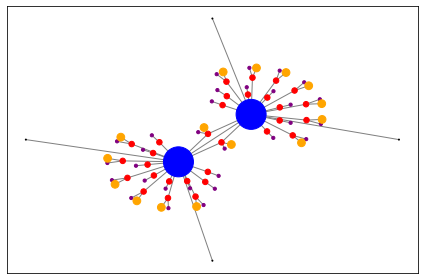

In [87]:
pos_keys = [*pos_1]
p = len(pos_keys)
ordered_area = []
ordered_func = []
for i in range(p):
    index = labels_1.index(pos_keys[i])
    ordered_area.append(function_data[index][2])
    ordered_func.append(function_data[index][0])

#colors
color_func = {
"shop" : "red",
"square" : "blue",
"workshop" : "orange",
"storage" : "purple",
"anchor" : "black"
}
color_list = []
for func in ordered_func:
    color_list.append(color_func[func])


# nodes
nx.draw_networkx_nodes(G, pos_1,node_size=ordered_area, node_color=color_list)
# edges
nx.draw_networkx_edges(G, pos_1, edgelist=elarge, width=1, edge_color="grey")
# labels
#nx.draw_networkx_labels(G, pos_1, font_size=10, font_family="sans-serif", font_color="black")

plt.tight_layout()
